<a href="https://colab.research.google.com/github/natisgonzalez28/Talleres-segundo-corte/blob/main/Guia_configuracion_de_entornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gu´ıa Estructurada para la Configuraci´on de Entornos de
# Desarrollo en Ciencia de Datos

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving requirements.txt to requirements.txt


In [ ]:
import sys
venv_path = '/content/data_science_env/lib/python3.10/site-packages'
sys.path.insert(1, venv_path)


In [ ]:
import pandas
# La ruta impresa debe apuntar al directorio del venv
print(pandas.__file__)


/usr/local/lib/python3.12/dist-packages/pandas/__init__.py


In [ ]:
import sys
venv_path = '/content/data_science_env/lib/python3.10/site-packages'
# Comprobar si la ruta est´a en sys.path antes de intentar eliminarla
if venv_path in sys.path:
    sys.path.remove(venv_path)
    print(f"Ruta {venv_path} eliminada de sys.path.")
    print("El kernel ahora usar´a los paquetes del entorno base de Colab.")
else:
    print("La ruta del entorno virtual no se encontr´o en sys.path.")


Ruta /content/data_science_env/lib/python3.10/site-packages eliminada de sys.path.
El kernel ahora usar´a los paquetes del entorno base de Colab.


In [ ]:
import pandas as pd
# URL del conjunto de datos "Online Retail" del repositorio UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
# Se usa read_excel ya que la fuente es un archivo Excel
data = pd.read_excel(url)


Valores faltantes por columna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Estad´ısticas descriptivas:
             Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%

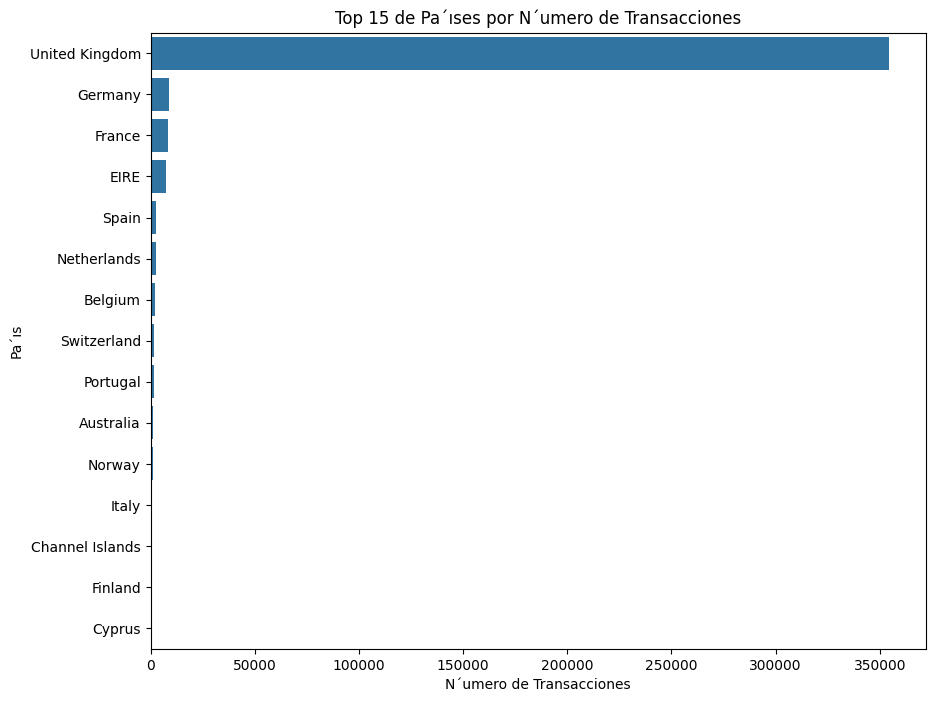

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Valores faltantes por columna:\n", data.isnull().sum())
print("\nEstad´ısticas descriptivas:\n", data.describe())
data = data.dropna(subset=['CustomerID']) # Paso adicional: eliminar filas sin cliente
data = data[data['Quantity'] > 0]
plt.figure(figsize=(10, 8))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index[:15])
plt.title('Top 15 de Pa´ıses por N´umero de Transacciones')
plt.xlabel('N´umero de Transacciones')
plt.ylabel('Pa´ıs')
plt.show()

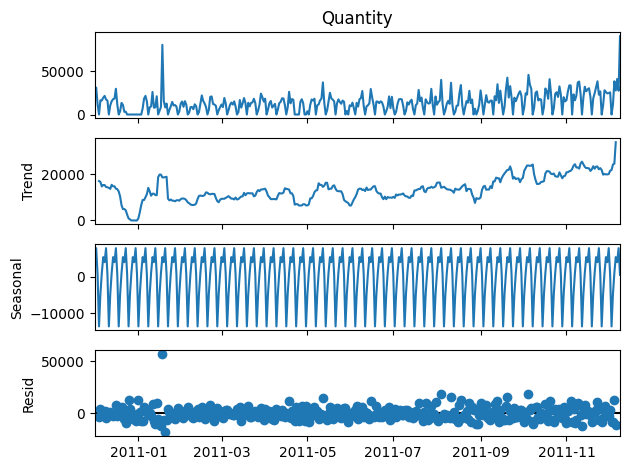

In [ ]:
import statsmodels.api as sm

# Preparar los datos: usar InvoiceDate como ´ındice y agregar ventas diarias
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
daily_sales = data.set_index('InvoiceDate')['Quantity'].resample('D').sum()

# Realizar la descomposici´on estacional
decomposition = sm.tsa.seasonal_decompose(daily_sales.dropna(), model='additive')
# Visualizar los componentes
fig = decomposition.plot()
plt.show()



In [ ]:
import altair as alt

# Selección de columnas relevantes
chart = alt.Chart(data.sample(2000)).mark_circle(size=60).encode(
    x='UnitPrice',
    y='Quantity',
    tooltip=['Description', 'Country']
).interactive().properties(
    title='Dispersión: Cantidad vs Precio Unitario',
    width=600,
    height=400
)

chart


alt.Chart(...)